In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nilearn import image
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn import plotting
sys.path.append('..')
from utils.data import Subject, Block

In [4]:
base_dir = '/Users/hugofluhr/data/LH_dev'
sub_id = 'sub-01'

In [5]:
subject = Subject(base_dir, sub_id)

/Users/hugofluhr/phd_local/repositories/RewardPairsTask_Analysis/notebooks/../utils/data.py:541: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_trials = pd.concat(all_trials, ignore_index=True)


In [6]:
subject.trials

,block,left_stim,right_stim,left_value,right_value,shift,action,rt,chosen_stim,reward,correct,t_first_stim,t_second_stim,t_action,t_purple_frame,t_points_feedback,t_iti_onset,t_trial_end
0,learning_1,5,7,3,4,0,1.0,0.934432,5.0,3,0.0,0.009399,0.826556,1.760988,1.766016,2.268539,3.335600,10.010661
1,learning_1,4,6,3,4,1,1.0,0.645392,4.0,3,0.0,10.010661,10.895611,11.541003,11.543884,12.045623,13.401687,20.403639
2,learning_1,3,1,2,1,0,NaN,NaN,NaN,NaN,NaN,20.403639,21.369311,0.000000,0.000000,0.000000,23.875462,30.675264
3,learning_1,6,8,4,5,0,1.0,0.368762,6.0,4,0.0,30.675264,31.478573,31.847335,31.849628,32.351760,33.984344,40.081664
4,learning_1,2,4,2,3,0,1.0,0.537730,2.0,2,0.0,40.081664,40.994311,41.532041,41.534648,42.036649,43.500880,49.945219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,test,4,2,3,2,1,1.0,0.512455,4.0,3,1.0,1322.638279,1323.491548,1324.004002,1324.005952,NaN,1325.994450,1332.118539
324,test,6,4,4,3,1,1.0,0.613739,6.0,4,1.0,1332.118539,1332.921338,1333.535078,1333.537728,NaN,1335.424989,1341.450269
325,test,4,5,3,3,0,1.0,0.884409,4.0,3,0.0,1341.450269,1342.319548,1343.203957,1343.205973,NaN,1344.822379,1351.080787
326,test,3,2,2,2,0,2.0,0.778679,2.0,2,0.0,1351.080787,1352.032160,1352.810838,1352.812656,NaN,1354.534839,1360.803064


# Test Phase, looking at basic constrasts

In [7]:
events=subject.get_event_df('test')
events.head(15)

,onset,duration,trial_type
0,0.002346,0.813894,first_stim_presentation
1,0.816239,0.550671,second_stim_presentation
2,1.366910,0.000000,response
3,1.370405,1.951056,purple_frame
4,3.321461,6.203388,iti
5,9.524849,0.805284,first_stim_presentation
6,10.330133,0.443547,second_stim_presentation
7,10.773680,0.000000,response
8,10.776506,2.057924,purple_frame
9,12.834430,6.499065,iti


In [8]:
img_path = '/Users/hugofluhr/data/LH_dev/bids_sample_190924/derivatives/fmriprep-24.0.1_correctB0/sub-01/ses-1/func/sub-01_ses-1_task-test_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
fmri_img = image.load_img(img_path)

In [9]:
# get the confounds
confouds_path = '/Users/hugofluhr/data/LH_dev/bids_sample_190924/derivatives/fmriprep-24.0.1_correctB0/sub-01/ses-1/func/sub-01_ses-1_task-test_run-3_desc-confounds_timeseries.tsv'
confounds = pd.read_csv(confouds_path, sep='\t')

In [31]:
fmri_glm = FirstLevelModel(
    t_r=2.33384,  # Set your TR (repetition time)
    noise_model='ar1',  # autocorrelation noise model
    standardize=True,  # standardize the data
    hrf_model='spm',  # you can also choose 'glover'
    drift_model='cosine',  # high-pass filtering
    high_pass=0.01,  # in Hz
    smoothing_fwhm=5,  # in mm
    mask_img=None,  # Specify a mask if needed, otherwise Nilearn can compute one
)

In [32]:
# Fit the model
fmri_glm = fmri_glm.fit(fmri_img, events=events)#, confounds=confounds)

/Users/hugofluhr/miniforge3/envs/neuroim/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response.
  warnings.warn(


In [33]:
design_matrix = fmri_glm.design_matrices_[0]

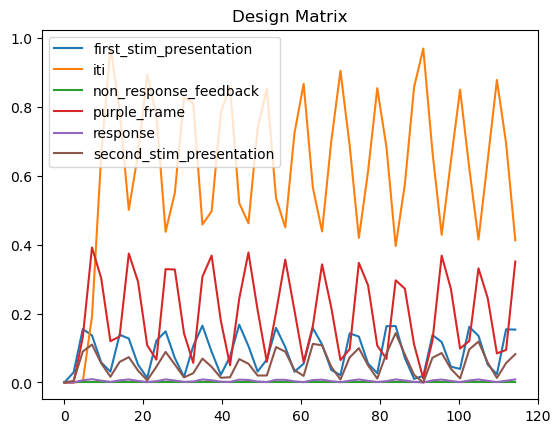

In [34]:
# Plot the design matrix
plt.plot(design_matrix.iloc[:50,:6])
plt.title('Design Matrix')
plt.legend(design_matrix.columns[:6])
plt.show()

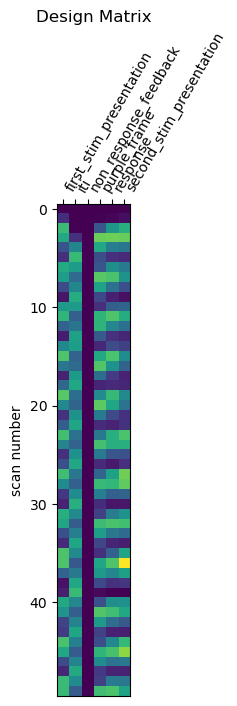

In [35]:
# Plot the design matrix
plot_design_matrix(design_matrix.iloc[:50,:6])
plt.title('Design Matrix')
plt.show()

In [37]:
design_matrix.columns

Index(['first_stim_presentation', 'iti', 'non_response_feedback',
       'purple_frame', 'response', 'second_stim_presentation', 'drift_1',
       'drift_2', 'drift_3', 'drift_4', 'drift_5', 'drift_6', 'drift_7',
       'drift_8', 'drift_9', 'drift_10', 'drift_11', 'drift_12', 'drift_13',
       'drift_14', 'drift_15', 'drift_16', 'drift_17', 'drift_18', 'drift_19',
       'drift_20', 'drift_21', 'drift_22', 'drift_23', 'drift_24', 'drift_25',
       'drift_26', 'drift_27', 'constant'],
      dtype='object')

In [5]:
13.93/(42.58*10**6*3*)

1.0485541544724261e-08

In [38]:
contrast_matrix = np.zeros((design_matrix.shape[1],))
contrast_matrix[:6]=[1,-1,0,0,0,1]

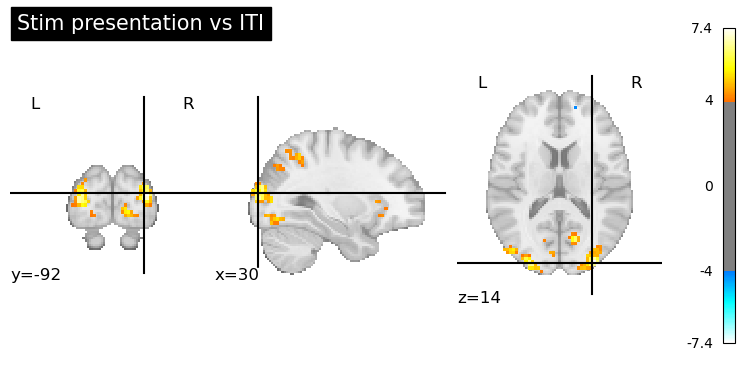

In [41]:
z_map = fmri_glm.compute_contrast(contrast_matrix, output_type='z_score')
# Plot the Z-map for visualizing where the contrast is significant
plotting.plot_stat_map(z_map, display_mode='ortho', threshold=4.0, title='Stim presentation vs ITI')
plotting.show()


# Testing nilearn tools to interface with BIDS

In [42]:
from nilearn.glm.first_level import first_level_from_bids
from nilearn.interfaces.fmriprep import load_confounds

In [46]:
confs ,_ = load_confounds(img_path, )

In [50]:
confs.columns

Index(['cosine00', 'cosine01', 'cosine02', 'cosine03', 'cosine04', 'cosine05',
       'cosine06', 'cosine07', 'cosine08', 'cosine09', 'cosine10', 'cosine11',
       'cosine12', 'cosine13', 'cosine14', 'cosine15', 'cosine16', 'cosine17',
       'cosine18', 'cosine19', 'csf', 'rot_x', 'rot_x_derivative1',
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2', 'trans_x', 'trans_x_derivative1',
       'trans_x_derivative1_power2', 'trans_x_power2', 'trans_y',
       'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
       'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2',
       'trans_z_power2', 'white_matter'],
      dtype='object')